数据科学导论 第二次作业 何娜（2018211555）

[参考链接1：构建风控评分卡模型介绍（WOE/KS/ROC)](https://blog.csdn.net/htbeker/article/details/79697557)

[参考链接2:信用申请评分卡建模](https://github.com/htbeker/Application_score_card/blob/master/appliaction_score_card.py)

In [107]:
import pandas as pd
names = ['college','income','overage','house','handset_price','over_15mins_calls_per_month','average_call_duration','reported_satisfaction','reported_usage_level',
        'considering_change_of_plan','leave']
church_df = pd.read_csv(r'C:\Users\henachris\Desktop\churn',names=names,header=None)

In [108]:
church_df.head()

,college,income,overage,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [109]:
church_df.groupby('leave').mean()[['income','overage','handset_price','over_15mins_calls_per_month','average_call_duration']].reset_index()

,leave,income,overage,handset_price,over_15mins_calls_per_month,average_call_duration
0,LEAVE,106.500711,25.546285,408.976350,9.832217,5.963358
1,STAY,66.056957,22.299074,370.818585,6.222605,6.040008


In [110]:
church_df.describe()

,college,income,overage,house,handset_price,over_15mins_calls_per_month,average_call_duration
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [111]:
#分箱
church_df['income_rank']=pd.qcut(church_df['income'],5)
church_df['overage_rank']=pd.qcut(church_df['overage'],5,duplicates='drop')
church_df['handset_price_rank']=pd.qcut(church_df['handset_price'],5)
church_df['over_15mins_calls_per_month_rank']=pd.qcut(church_df['over_15mins_calls_per_month'],5)
church_df['average_call_duration_rank']=pd.qcut(church_df['average_call_duration'],5)

In [112]:
church_df.head()

,college,income,overage,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,income_rank,overage_rank,handset_price_rank,over_15mins_calls_per_month_rank,average_call_duration_rank
zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY,"(-2.001, 0.0]","(-0.001, 9.0]","(129.999, 201.0]","(-0.001, 1.0]","(2.0, 4.0]"
one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY,"(-2.001, 0.0]","(9.0, 20.0]","(201.0, 280.0]","(-0.001, 1.0]","(4.0, 6.0]"
one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY,"(192.0, 335.0]","(-0.001, 9.0]","(129.999, 201.0]","(5.0, 18.0]","(11.0, 15.0]"
zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE,"(0.0, 46.0]","(20.0, 51.0]","(608.0, 899.0]","(1.0, 3.0]","(0.999, 2.0]"
one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY,"(192.0, 335.0]","(51.0, 89.0]","(201.0, 280.0]","(18.0, 29.0]","(0.999, 2.0]"


In [113]:
#计算各变量的iv值
import numpy as np
def CalcIV(Xvar, Yvar):
   N_0  = np.sum(Yvar=='STAY')
   N_1 = np.sum(Yvar=='LEAVE')
   N_0_group = np.zeros(np.unique(Xvar).shape)
   N_1_group = np.zeros(np.unique(Xvar).shape)
   for i in range(len(np.unique(Xvar))):
       N_0_group[i] = Yvar[(Xvar == np.unique(Xvar)[i]) & (Yvar == 'STAY')].count()
       N_1_group[i] = Yvar[(Xvar == np.unique(Xvar)[i]) & (Yvar == 'LEAVE')].count()
   iv = np.sum((N_0_group/N_0 - N_1_group/N_1) * np.log((N_0_group/N_0)/(N_1_group/N_1)))
   return  iv   
   
def caliv_batch(df, Yvar):
   df_Xvar = df.drop([Yvar], axis=1)
   ivlist = []
   for col in df_Xvar.columns:
       iv = CalcIV(df[col], df[Yvar])
       ivlist.append(iv)
   names = list(df_Xvar.columns)
   iv_df = pd.DataFrame({'Var': names, 'Iv': ivlist}, columns=['Var', 'Iv'])

   return iv_df

In [114]:
#计算iv值
caliv_batch(church_df[['reported_satisfaction','reported_usage_level','considering_change_of_plan','income_rank','overage_rank','handset_price_rank','over_15mins_calls_per_month_rank','average_call_duration_rank','leave']],'leave')

,Var,Iv
0,reported_satisfaction,0.001699
1,reported_usage_level,0.000215
2,considering_change_of_plan,0.000662
3,income_rank,0.215056
4,overage_rank,0.041540
5,handset_price_rank,0.031040
6,over_15mins_calls_per_month_rank,0.196716
7,average_call_duration_rank,0.049781


In [115]:
church_df.columns

Index(['college', 'income', 'overage', 'house', 'handset_price',
       'over_15mins_calls_per_month', 'average_call_duration',
       'reported_satisfaction', 'reported_usage_level',
       'considering_change_of_plan', 'leave', 'income_rank', 'overage_rank',
       'handset_price_rank', 'over_15mins_calls_per_month_rank',
       'average_call_duration_rank'],
      dtype='object')

In [116]:
church_df['reported_satisfaction'].unique()

array(['unsat', 'very_unsat', 'very_sat', 'avg', 'sat'], dtype=object)

In [117]:
#字符型变量的编码
reported_satisfaction_dict = {
    'very_unsat':1,
    'unsat':2,
    'avg':3,
    'sat':4,
    'very_sat':5
}
church_df['reported_satisfaction'] = church_df['reported_satisfaction'].map(reported_satisfaction_dict)

In [118]:
church_df['reported_usage_level'].unique()

array(['little', 'very_little', 'very_high', 'high', 'avg'], dtype=object)

In [119]:
reported_usage_level_dict = {
    'very_little':1,
    'little':2,
    'avg':3,
    'high':4,
    'very_high':5
}
church_df['reported_usage_level'] = church_df['reported_usage_level'].map(reported_usage_level_dict)

In [120]:
church_df['considering_change_of_plan'].unique()

array(['no', 'considering', 'perhaps', 'never_thought',
       'actively_looking_into_it'], dtype=object)

In [121]:
considering_change_of_plan_dict = {
    'never_thought':1,
    'no':2,
    'perhaps':3,
   'considering':4,
    'actively_looking_into_it':5
}
church_df['considering_change_of_plan'] = church_df['considering_change_of_plan'].map(considering_change_of_plan_dict)

In [122]:
church_df['income_rank'].astype(str).unique()

array(['(-2.001, 0.0]', '(192.0, 335.0]', '(0.0, 46.0]', '(46.0, 72.0]',
       '(72.0, 192.0]'], dtype=object)

In [123]:
income_rank_dict = {
    '(-2.001, 0.0]':1,
    '(0.0, 46.0]':2,
    '(46.0, 72.0]':3,
    '(72.0, 192.0]':4,
    '(192.0, 335.0]':5
}
church_df['income_rank'] = church_df['income_rank'].astype(str).map(income_rank_dict)

In [124]:
church_df[ 'overage_rank'].astype(str).unique()

array(['(-0.001, 9.0]', '(9.0, 20.0]', '(20.0, 51.0]', '(51.0, 89.0]'],
      dtype=object)

In [125]:
overage_rank_dict = {
    '(-0.001, 9.0]':1,
   '(9.0, 20.0]':2,
    '(20.0, 51.0]':3,
    '(51.0, 89.0]':4,
}
church_df['overage_rank'] = church_df['overage_rank'].astype(str).map(overage_rank_dict)

In [126]:
church_df[ 'handset_price_rank'].astype(str).unique()

array(['(129.999, 201.0]', '(201.0, 280.0]', '(608.0, 899.0]',
       '(280.0, 371.0]', '(371.0, 608.0]'], dtype=object)

In [127]:
handset_price_rank_dict = {
    '(129.999, 201.0]':1,
   '(201.0, 280.0]':2,
    '(280.0, 371.0]':3,
    '(371.0, 608.0]':4,
    '(608.0, 899.0]':5
}
church_df['handset_price_rank'] = church_df['handset_price_rank'].astype(str).map(handset_price_rank_dict)

In [128]:
church_df['over_15mins_calls_per_month_rank'].astype(str).unique()

array(['(-0.001, 1.0]', '(5.0, 18.0]', '(1.0, 3.0]', '(18.0, 29.0]',
       '(3.0, 5.0]'], dtype=object)

In [129]:
over_15mins_calls_per_month_rank_dict = {
    '(-0.001, 1.0]':1,
   '(1.0, 3.0]':2,
     '(3.0, 5.0]':3,
    '(5.0, 18.0]':4,
     '(18.0, 29.0]':5
}
church_df['over_15mins_calls_per_month_rank'] = church_df['over_15mins_calls_per_month_rank'].astype(str).map(over_15mins_calls_per_month_rank_dict)

In [130]:
church_df['average_call_duration_rank'].astype(str).unique()

array(['(2.0, 4.0]', '(4.0, 6.0]', '(11.0, 15.0]', '(0.999, 2.0]',
       '(6.0, 11.0]'], dtype=object)

In [131]:
average_call_duration_rank_dict = {
   '(0.999, 2.0]':1,
   '(2.0, 4.0]':2,
    '(4.0, 6.0]':3,
    '(6.0, 11.0]':4,
     '(11.0, 15.0]':5
}
church_df['average_call_duration_rank'] = church_df['average_call_duration_rank'].astype(str).map(average_call_duration_rank_dict)

In [132]:
leave_dict = {
    'LEAVE':1,
    'STAY':0
}
church_df['leave'] = church_df['leave'].map(leave_dict)

In [133]:
church_df.head()

,college,income,overage,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,income_rank,overage_rank,handset_price_rank,over_15mins_calls_per_month_rank,average_call_duration_rank
zero,31953,0,6,313378,161,0,4,2,2,2,0,1,1,1,1,2
one,36147,0,13,800586,244,0,6,2,2,4,0,1,2,2,1,3
one,27273,230,0,305049,201,16,15,2,1,3,0,5,1,1,4,5
zero,120070,38,33,788235,780,3,2,2,5,4,1,2,3,5,2,1
one,29215,208,85,224784,241,21,1,1,2,1,0,5,4,2,5,1


In [134]:
#建立决策树模型
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import metrics

features=['over_15mins_calls_per_month_rank', 'average_call_duration_rank',
       'reported_satisfaction', 'reported_usage_level',
       'considering_change_of_plan',  'income_rank', 'overage_rank',
       'handset_price_rank']
# 特征数据
church_feature = church_df[features].values
# 分类数据
church_target = church_df['leave'].values
#10折交叉验证
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=666)
y_predict_list = []
for fold_, (trn_idx, tst_idx) in enumerate(folds.split(church_feature,church_target)):
    print("fold {}".format(fold_+1))
    X_train,X_test = church_feature[trn_idx],church_feature[tst_idx]
    Y_train,Y_test = church_target[trn_idx],church_target[tst_idx]
    #建模
    dt_model = DecisionTreeClassifier(min_samples_leaf=30,max_depth=4)
    dt_model.fit(X_train,Y_train)
    print()
    #特征的重要性
    print('特征的重要性为：')
    print(dict(zip(features,dt_model.feature_importances_)))
    print()
    y_predict = dt_model.predict(X_test)
    print('精确率为:',accuracy_score(Y_test, y_predict))
    print("查准率:",metrics.precision_score(Y_test, y_predict))
    print("召回率:",metrics.recall_score(Y_test, y_predict))
    print("F1_score:",metrics.f1_score(Y_test, y_predict))
    print()
    #取各个模型的预测均值
    y_predict_list.append(y_predict)

fold 1

特征的重要性为：
{'over_15mins_calls_per_month_rank': 0.05825710505302894, 'average_call_duration_rank': 0.19343071743805376, 'reported_satisfaction': 0.0, 'reported_usage_level': 0.0, 'considering_change_of_plan': 0.0, 'income_rank': 0.6217097325596147, 'overage_rank': 0.025001139441612173, 'handset_price_rank': 0.10160130550769036}

精确率为: 0.6306846576711644
查准率: 0.6434378629500581
召回率: 0.5618661257606491
F1_score: 0.5998917162966974

fold 2

特征的重要性为：
{'over_15mins_calls_per_month_rank': 0.051192357054686374, 'average_call_duration_rank': 0.1890290353185831, 'reported_satisfaction': 0.0, 'reported_usage_level': 0.0, 'considering_change_of_plan': 0.0, 'income_rank': 0.6311879636070662, 'overage_rank': 0.023621496559072103, 'handset_price_rank': 0.1049691474605924}

精确率为: 0.6266866566716641
查准率: 0.641755634638197
召回率: 0.5486815415821501
F1_score: 0.5915800984144342

fold 3

特征的重要性为：
{'over_15mins_calls_per_month_rank': 0.049511833715938224, 'average_call_duration_rank': 0.19915412667097

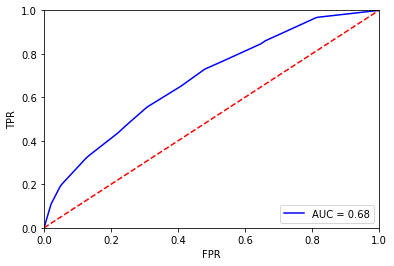

In [135]:
#绘制决策树roc曲线
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc 
# y_pred= lr.predict(train_x)   
train_predprob = dt_model.predict_proba(X_train)[:,1]   
test_predprob = dt_model.predict_proba(X_test)[:,1]  
FPR,TPR,threshold =roc_curve(Y_test,test_predprob) 
ROC_AUC= auc(FPR,TPR) 
plt.plot(FPR, TPR, 'b', label='AUC = %0.2f' % ROC_AUC) 
plt.legend(loc='lower right') 
plt.plot([0, 1], [0, 1], 'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('TPR') 
plt.xlabel('FPR') 
plt.show() 

In [136]:
from sklearn.tree import _tree

def tree_to_code(tree_, feature_names):
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
print(tree_to_code(dt_model.tree_, features))

def tree(over_15mins_calls_per_month_rank, average_call_duration_rank, reported_satisfaction, reported_usage_level, considering_change_of_plan, income_rank, overage_rank, handset_price_rank):
  if income_rank <= 3.5:
    if average_call_duration_rank <= 1.5:
      if overage_rank <= 2.5:
        if overage_rank <= 1.5:
          return [[120.  93.]]
        else:  # if overage_rank > 1.5
          return [[92. 23.]]
      else:  # if overage_rank > 2.5
        if handset_price_rank <= 3.5:
          return [[1036.  967.]]
        else:  # if handset_price_rank > 3.5
          return [[623. 757.]]
    else:  # if average_call_duration_rank > 1.5
      if average_call_duration_rank <= 3.5:
        if income_rank <= 1.5:
          return [[1723.  334.]]
        else:  # if income_rank > 1.5
          return [[829. 675.]]
      else:  # if average_call_duration_rank > 3.5
        if handset_price_rank <= 3.5:
          return [[1302.  872.]]
        else:  # if handset_price_rank > 3.5
   

In [137]:
#根据决策树的某一类的划分找到规则
#类1
# if income_rank <= 3.5:
#    if average_call_duration_rank <= 1.5:
#      if overage_rank <= 2.5:
#       if overage_rank <= 1.5:
#         return [[120.  93.]]
church_df.loc[(church_df.income_rank<=3.5) & (church_df.average_call_duration_rank <= 1.5) & (church_df.overage_rank <= 1.5)]

,college,income,overage,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,income_rank,overage_rank,handset_price_rank,over_15mins_calls_per_month_rank,average_call_duration_rank
one,129023,45,5,675998,752,4,1,5,1,4,1,2,1,5,3,1
zero,40007,50,0,452723,140,5,1,1,2,3,1,3,1,1,3,1
one,48273,71,0,414753,130,3,2,3,2,2,1,3,1,1,2,1
one,47499,62,0,792947,219,3,2,2,5,4,0,3,1,2,2,1
zero,96351,60,0,198925,307,5,1,5,5,5,0,3,1,3,3,1
zero,114183,0,9,189644,517,0,2,1,2,5,0,1,1,4,1,1
one,97556,41,0,612559,354,5,2,5,2,5,1,2,1,3,3,1
one,149705,0,8,928895,680,0,2,2,4,4,0,1,1,5,1,1
one,140110,41,0,263558,470,3,1,1,4,4,1,2,1,4,2,1
one,68682,40,0,160107,255,3,2,2,2,2,0,2,1,2,2,1


In [138]:
#类2
#else:  # if income_rank > 3.5
#   if handset_price_rank <= 3.5:
#     if over_15mins_calls_per_month_rank <= 3.5:
#       if income_rank <= 4.5:
#         return [[427. 355.]]
church_df.loc[(church_df.income_rank>3.5) & (church_df.handset_price_rank <= 3.5) & (church_df.income_rank <= 4.5)]

,college,income,overage,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,income_rank,overage_rank,handset_price_rank,over_15mins_calls_per_month_rank,average_call_duration_rank
one,50939,76,13,587207,336,3,5,3,2,4,0,4,2,3,2,3
zero,45482,82,6,607518,157,5,2,3,5,2,0,4,1,1,3,1
zero,53391,74,69,599957,287,5,2,1,5,2,1,4,4,3,3,1
one,86658,78,15,150852,296,4,5,5,5,1,0,4,2,3,3,3
zero,42647,164,0,459225,214,12,14,1,5,5,0,4,1,2,4,5
zero,60057,159,0,439553,321,28,11,1,2,2,1,4,1,3,5,4
one,40980,76,18,812104,231,3,11,1,2,4,0,4,2,2,2,4
zero,79054,165,12,177411,351,27,4,3,1,5,1,4,2,3,5,2
zero,28916,192,88,723263,245,21,1,4,2,4,0,4,4,2,5,1
one,97754,97,45,937656,286,4,1,5,3,1,0,4,3,3,3,1


In [97]:
#逻辑回归需要onehot编码
cols=['over_15mins_calls_per_month_rank', 'average_call_duration_rank',
       'reported_satisfaction', 'reported_usage_level',
       'considering_change_of_plan','income_rank', 'overage_rank',
       'handset_price_rank']
features = []
for col in cols:
    dummies = pd.get_dummies(church_df[col],prefix=col)
    features.extend(list(dummies.columns))
    church_df = pd.concat((church_df,dummies),axis=1)

In [98]:
features

['over_15mins_calls_per_month_rank_1',
 'over_15mins_calls_per_month_rank_2',
 'over_15mins_calls_per_month_rank_3',
 'over_15mins_calls_per_month_rank_4',
 'over_15mins_calls_per_month_rank_5',
 'average_call_duration_rank_1',
 'average_call_duration_rank_2',
 'average_call_duration_rank_3',
 'average_call_duration_rank_4',
 'average_call_duration_rank_5',
 'reported_satisfaction_1',
 'reported_satisfaction_2',
 'reported_satisfaction_3',
 'reported_satisfaction_4',
 'reported_satisfaction_5',
 'reported_usage_level_1',
 'reported_usage_level_2',
 'reported_usage_level_3',
 'reported_usage_level_4',
 'reported_usage_level_5',
 'considering_change_of_plan_1',
 'considering_change_of_plan_2',
 'considering_change_of_plan_3',
 'considering_change_of_plan_4',
 'considering_change_of_plan_5',
 'income_rank_1',
 'income_rank_2',
 'income_rank_3',
 'income_rank_4',
 'income_rank_5',
 'overage_rank_1',
 'overage_rank_2',
 'overage_rank_3',
 'overage_rank_4',
 'handset_price_rank_1',
 'handset

In [99]:
church_df.head()

,college,income,overage,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,...,income_rank_5,overage_rank_1,overage_rank_2,overage_rank_3,overage_rank_4,handset_price_rank_1,handset_price_rank_2,handset_price_rank_3,handset_price_rank_4,handset_price_rank_5
zero,31953,0,6,313378,161,0,4,2,2,2,...,0,1,0,0,0,1,0,0,0,0
one,36147,0,13,800586,244,0,6,2,2,4,...,0,0,1,0,0,0,1,0,0,0
one,27273,230,0,305049,201,16,15,2,1,3,...,1,1,0,0,0,1,0,0,0,0
zero,120070,38,33,788235,780,3,2,2,5,4,...,0,0,0,1,0,0,0,0,0,1
one,29215,208,85,224784,241,21,1,1,2,1,...,1,0,0,0,1,0,1,0,0,0


In [100]:
#建立逻辑回归模型
# 特征数据
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
church_feature = church_df[features].values
# 分类数据
church_target = church_df['leave'].values
#10折交叉验证
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=666)
y_predict_list = []
for fold_, (trn_idx, tst_idx) in enumerate(folds.split(church_feature,church_target)):
    print("fold {}".format(fold_))
    X_train,X_test = church_feature[trn_idx],church_feature[tst_idx]
    Y_train,Y_test = church_target[trn_idx],church_target[tst_idx]
    #建模
    lr_model = LogisticRegression(C = 1.0)
    lr_model.fit(X_train,Y_train)
    y_predict = lr_model.predict(X_test)
    print('精确率为',accuracy_score(Y_test, y_predict))
    print("查准率:",metrics.precision_score(Y_test, y_predict))
    print("召回率:",metrics.recall_score(Y_test, y_predict))
    print("F1_score:",metrics.f1_score(Y_test, y_predict))
    #取各个模型的预测均值
    y_predict_list.append(y_predict)

fold 0
精确率为 0.6151924037981009
查准率: 0.6186813186813187
召回率: 0.5709939148073022
F1_score: 0.5938818565400844
fold 1
精确率为 0.6086956521739131
查准率: 0.6154721274175199
召回率: 0.5486815415821501
F1_score: 0.5801608579088471
fold 2
精确率为 0.6
查准率: 0.6017601760176018
召回率: 0.5553299492385787
F1_score: 0.5776135163674763
fold 3
精确率为 0.6185
查准率: 0.6214442013129103
召回率: 0.5766497461928934
F1_score: 0.5982095839915746
fold 4
精确率为 0.634
查准率: 0.6422947131608548
召回率: 0.5796954314720812
F1_score: 0.6093916755602987
fold 5
精确率为 0.6265
查准率: 0.6268656716417911
召回率: 0.5969543147208122
F1_score: 0.6115444617784711
fold 6
精确率为 0.5945
查准率: 0.5949781659388647
召回率: 0.5532994923857868
F1_score: 0.5733824302998421
fold 7
精确率为 0.599
查准率: 0.6004390779363337
召回率: 0.5553299492385787
F1_score: 0.5770042194092827
fold 8
精确率为 0.6078039019509754
查准率: 0.6081808396124866
召回率: 0.5736040609137056
F1_score: 0.5903866248693835
fold 9
精确率为 0.6063031515757878
查准率: 0.6085526315789473
召回率: 0.5634517766497462
F1_score: 0.58513442277279

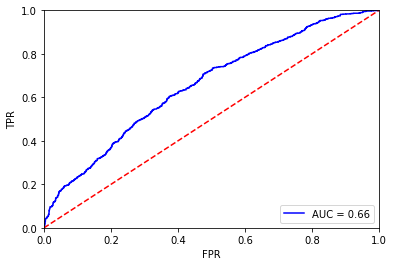

In [101]:
#绘制逻辑回归roc曲线
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc 
# y_pred= lr.predict(train_x)   
train_predprob = lr_model.predict_proba(X_train)[:,1]   
test_predprob = lr_model.predict_proba(X_test)[:,1]  
FPR,TPR,threshold =roc_curve(Y_test,test_predprob) 
ROC_AUC= auc(FPR,TPR) 
plt.plot(FPR, TPR, 'b', label='AUC = %0.2f' % ROC_AUC) 
plt.legend(loc='lower right') 
plt.plot([0, 1], [0, 1], 'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('TPR') 
plt.xlabel('FPR') 
plt.show() 